# Tutorial for Skeletal Editing in Drug Discovery

This notebook is the result of a collaboration between myself, [Dr. Jeremy E. Monat](https://www.linkedin.com/in/jemonat/), and [Dr. Phyo Phyo Zin](https://www.linkedin.com/in/phyophyokyawzin/). This is a hands-on tutorial that guides readers through implementing skeletal editing transformations using Python and RDKit, and Phyo Phyo focuses on the high-level principles and applications in the blog post [How to Use Skeletal Editing in Drug Discovery: Key Benefits & Applications
](https://drzinph.com/skeletal-editing-in-drug-discovery-applications-and-challenges/). Together, our goal is to provide both a conceptual understanding and practical approach to this emerging field.

## Code foundation

First we install the RDKit.

In [ ]:
%%capture
!pip install rdkit

Next we import the necessary modules.

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole

from IPython.display import display

Now we set up drawing options for the blog post.

In [ ]:
IPythonConsole.molSize = 400, 200

Let's define a function to display and run a reaction with [RunReactants](https://www.rdkit.org/docs/source/rdkit.Chem.rdChemReactions.html#rdkit.Chem.rdChemReactions.ChemicalReaction.RunReactants) using the RDKit's Reaction SMARTS format.

In [ ]:
def run_rxn(rxn_sml, mol):
    rxn = AllChem.ReactionFromSmarts(rxn_sml)
    print("Reaction:")
    display(rxn)
    try:
        products = rxn.RunReactants((mol,))
    except IndexError:
        raise IndexError(
            "Reaction failed; the starting material may not match the reaction SMARTS"
        )
    return products

Now let's fold that into a larger function that also displays the reactant and distinct products. Because of the way [SMARTS](https://en.wikipedia.org/wiki/SMILES_arbitrary_target_specification) matches parts of a molecule, we might have multiple identical products, so we only want to show each product once.

In [ ]:
def plot_rxn(rxn_sml, mol):
    try:
        products = run_rxn(rxn_sml, mol)
    except IndexError as e:
        print(e)
        return
    print("Reactant:")
    display(mol)
    if not products:
        print("No products")
        return
    print("Distinct products:")
    product_smls = set()
    for product in products:
        product_mol = product[0]
        Chem.SanitizeMol(product_mol)

        # Get the canonical SMILES string of the product molecule
        this_sml = Chem.MolToSmiles(product_mol)

        # If this product has already been made, don't display it again
        if this_sml in product_smls:
            continue
        product_smls.add(this_sml)
        print(Chem.MolToSmiles(product_mol))
        display(product_mol)
    return product_smls

## Skeletal Editing Reactions Used in Drug Discovery Blog Post

Here are three skeletal editing reactions used in Phyo Phyo's blog post. In each case, we give

1.   the general reaction and apply it to a generic reactant, then
2.   a modified reaction and apply it to a molecule related to drug discovery.



### Converting quinolines to quinazolines

This reaction is from [Woo et al., 2023](https://pubmed.ncbi.nlm.nih.gov/37914946/), scheme 1d.

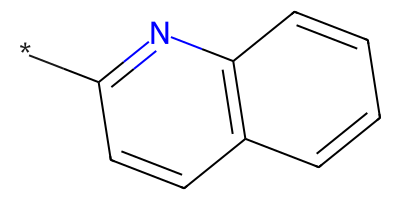

In [ ]:
quinoline = "*c1nc2c(cccc2)cc1"
quinoline_mol = Chem.MolFromSmiles(quinoline)
quinoline_mol

Reaction:


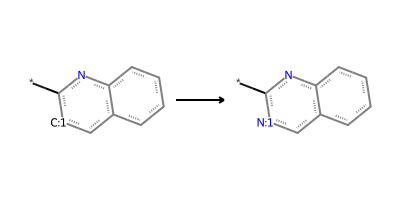

Reactant:


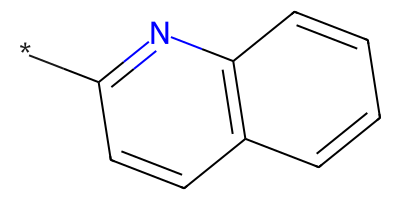

Distinct products:
*c1ncc2ccccc2n1


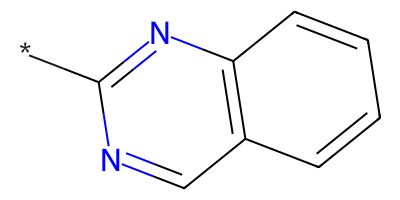

In [ ]:
quinoline_to_quinazoline = "*-c1nc2c(cccc2)c[c:1]1>>*-c1nc2c(cccc2)c[n:1]1"
product_smls = plot_rxn(quinoline_to_quinazoline, quinoline_mol)

**Skeletal Editing for Talnetant**

Reaction:


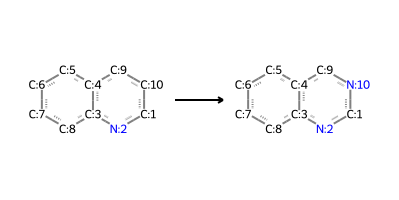

Reactant:


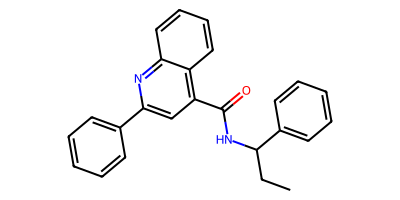

Distinct products:
CCC(NC(=O)c1nc(-c2ccccc2)nc2ccccc12)c1ccccc1


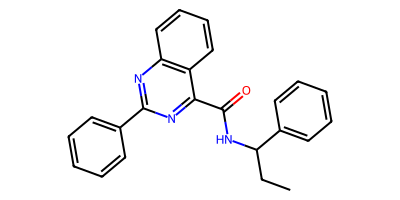

In [ ]:
quinoline_to_quinazoline_modified = "[cX3:1]1[n:2][c:3]2[c:4]([c:5][c:6][c:7][c:8]2)[c:9][c:10]1>>[cX3:1]1[n:2][c:3]2[c:4]([c:5][c:6][c:7][c:8]2)[c:9][n:10]1"
talnetant_smi = "c1ccccc1c2cc(C(=O)NC(CC)c4ccccc4)c3ccccc3n2"
talnetant_mol = Chem.MolFromSmiles(talnetant_smi)
product_smls = plot_rxn(quinoline_to_quinazoline_modified, talnetant_mol)

### Converting pyrrolidines to cyclobutanes

This reaction is from [Hui et al., 2021](https://pmc.ncbi.nlm.nih.gov/articles/PMC8603356/), Scheme 1.

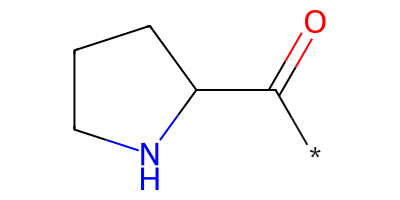

In [ ]:
pyrrolidine = "*C(=O)C1CCCN1"
pyrrolidine_mol = Chem.MolFromSmiles(pyrrolidine)
pyrrolidine_mol

Reaction:


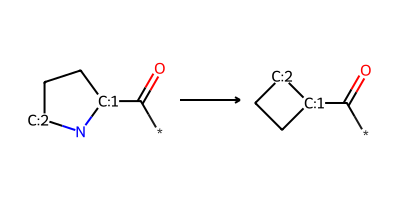

Reactant:


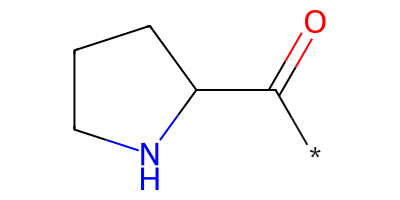

Distinct products:
*C(=O)C1CCC1


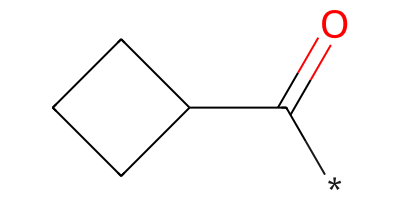

In [ ]:
pyrrolidine_to_cyclobutane = "*-C(=O)-[C:1]1-C-C-[C:2]-N-1>>*-C(=O)-[C:1]1-C-C-[C:2]-1"
product_smls = plot_rxn(pyrrolidine_to_cyclobutane, pyrrolidine_mol)

Reaction:


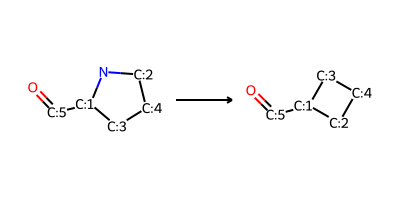

Reactant:


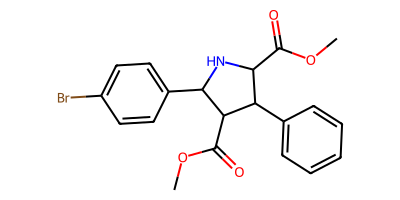

Distinct products:
COC(=O)C1C(c2ccccc2)C(C(=O)OC)C1c1ccc(Br)cc1


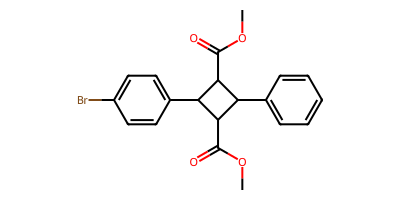

In [ ]:
pyrrolidine_to_cyclobutane_modified = (
    "[C:5](=O)-[C:1]1-[C:3]-[C:4]-[C:2]-N-1>>[C:5](=O)-[C:1]1-[C:3]-[C:4]-[C:2]-1"
)
starting_smi = "c1cc(Br)ccc1C2NC(C(=O)OC)C(c3ccccc3)C(C(=O)OC)2"
starting_mol = Chem.MolFromSmiles(starting_smi)
product_smls = plot_rxn(pyrrolidine_to_cyclobutane_modified, starting_mol)

### Converting nitroarenes into azepanes

This reaction is from [Mykura et al., 2024](https://www.nature.com/articles/s41557-023-01429-1).

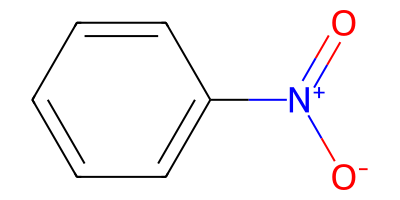

In [ ]:
nitroarene = "O=[N+]([O-])c1ccccc1"
nitroarene_mol = Chem.MolFromSmiles(nitroarene)
nitroarene_mol

Reaction:


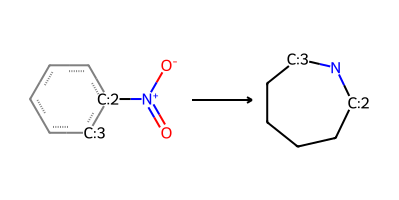

Reactant:


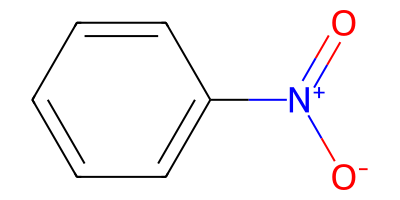

Distinct products:
C1CCCNCC1


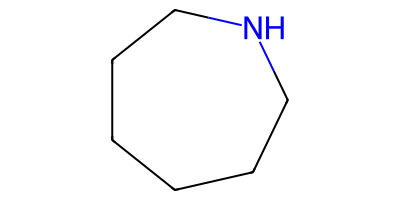

In [ ]:
nitroarene_to_azepane = "O=[N+](-[O-])-[c:2]1[c:3]cccc1>>[C:2]-1-[N]-[C:3]-C-C-C-C1"
product_smls = plot_rxn(nitroarene_to_azepane, nitroarene_mol)

Reaction:


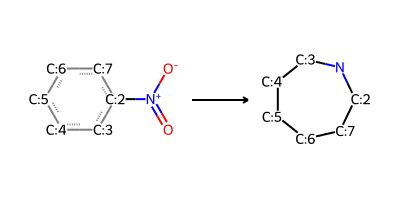

Reactant:


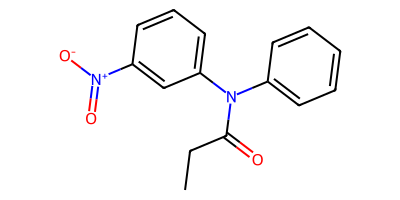

Distinct products:
CCC(=O)N(c1ccccc1)C1CCCNCC1


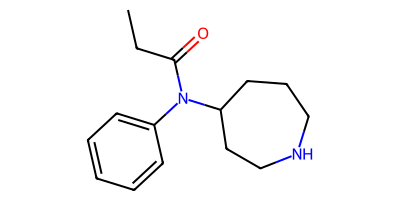

CCC(=O)N(c1ccccc1)C1CCCCNC1


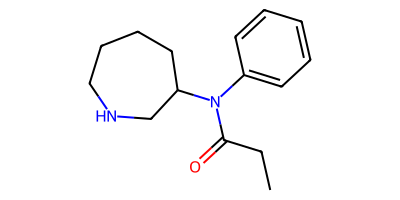

In [ ]:
nitroarene_to_azepane_modified = "O=[N+](-[O-])-[c:2]1[c:3][c:4][c:5][c:6][c:7]1>>[C:2]-1-[N]-[C:3]-[C:4]-[C:5]-[C:6]-[C:7]1"
starting_smi = "CCC(=O)N(c1ccccc1)c3cccc([N+](=O)[O-])c3"
starting_mol = Chem.MolFromSmiles(starting_smi)
product_smls = plot_rxn(nitroarene_to_azepane_modified, starting_mol)

Phyo Phyo discusses the distinction between these two products and the factors favoring one over the other in the blog post [How to Use Skeletal Editing in Drug Discovery: Key Benefits & Applications](https://drzinph.com/skeletal-editing-in-drug-discovery-applications-and-challenges/).